Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter the name of the company: reliance
Enter the name of the company: adanient
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
RELIANCE Sales


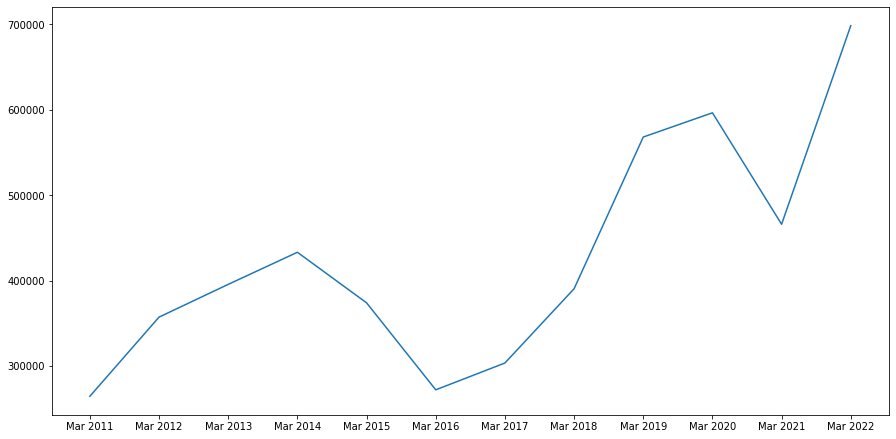

RELIANCE Profit


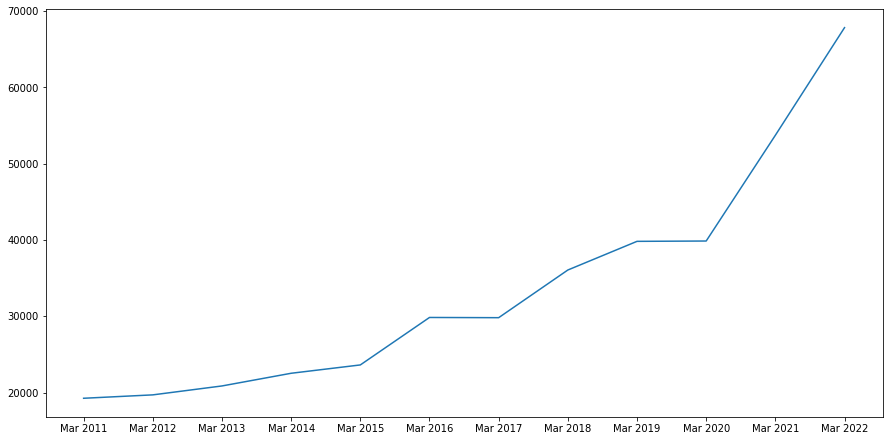

RELIANCE Shareholding Pattern


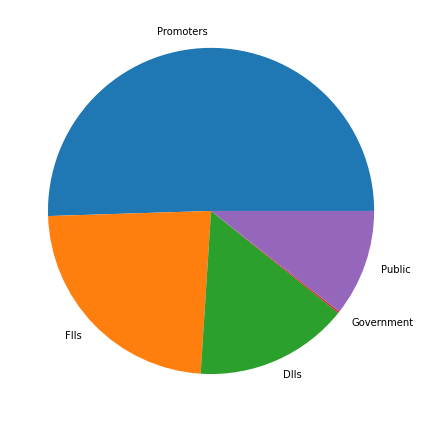

ADANIENT Sales


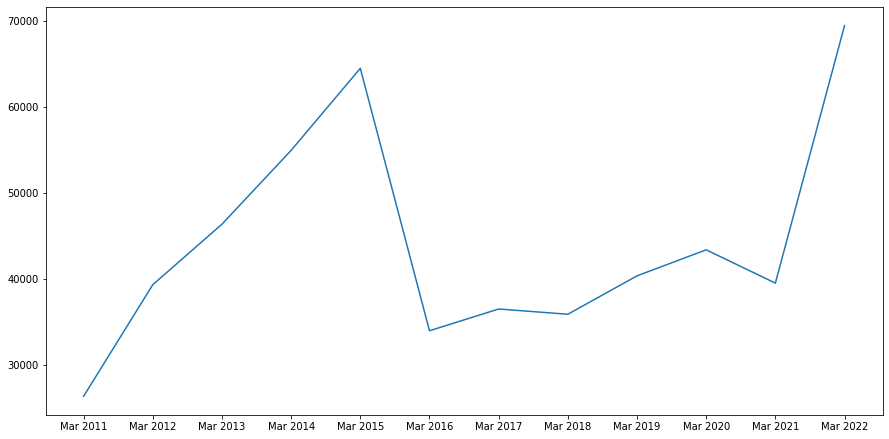

ADANIENT Profit


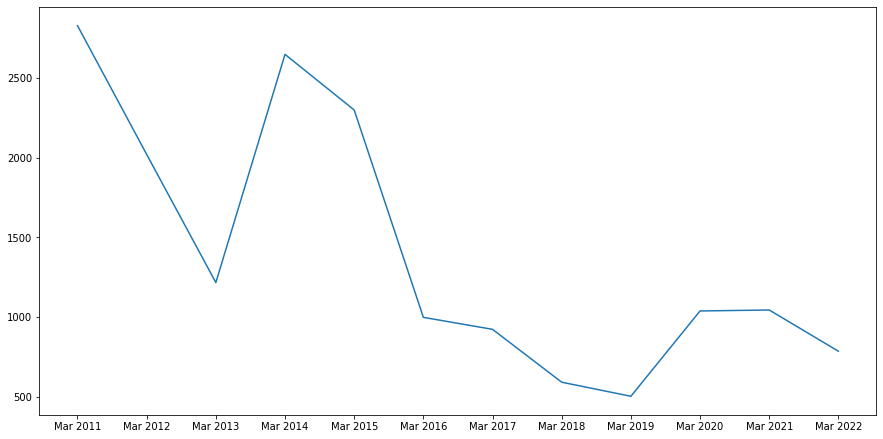

ADANIENT Shareholding Pattern


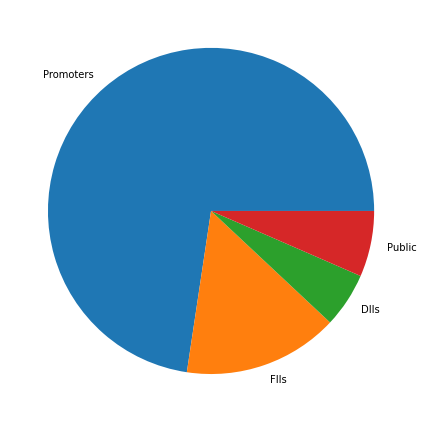

Therefore RELIANCE is a better buy


In [ ]:
#Installing and importing Library
!pip install yfinance
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Taking Input from the user
name=input("Enter the name of the company: ")
name= str(name)
name= name.upper()
name= name.replace(" ","")
n= name+'.NS'
name2=input("Enter the name of the company: ")
name2= str(name2)
name2= name2.upper()
name2= name2.replace(" ","")
n2= name2+'.NS'
#Downloading Data
yf.download(n)
stock1= yf.Ticker(n)
yf.download(n2)
stock2= yf.Ticker(n2)
#Downloading Dataframe
mean1=0
totalmean1= 0
histmean1= stock1.history(period='700d')
histmean1.drop(columns=['Dividends','Stock Splits'], inplace= True)
#Making new columns for standard deviations and finding 50 Day Moving Average and 200 Day Moving Average
histmean1['50MA']= histmean1['Close'].rolling(50).mean()
histmean1['200MA']= histmean1['Close'].rolling(200).mean()
histmean1['std1']= histmean1['Close'].rolling(200).std()
histmean1['200std1max']=histmean1['200MA']+histmean1['std1']
histmean1['200std1min']=histmean1['200MA']-histmean1['std1']
histmean1['std2']= 2*histmean1['std1']
histmean1['200std2max']=histmean1['200MA']+histmean1['std2']
histmean1['200std2min']=histmean1['200MA']-histmean1['std2']
histmean1['std3']= 3*histmean1['std1']
histmean1['200std3max']=histmean1['200MA']+histmean1['std3']
histmean1['200std3min']=histmean1['200MA']-histmean1['std3']
#Downloading Data for the second stock
mean2=0
totalmean2= 0
histmean2= stock2.history(period='700d')
#Making new columns for standard deviations and finding 50 Day Moving Average and 200 Day Moving Average for second company
histmean2.drop(columns=['Dividends','Stock Splits'], inplace= True)
histmean2['50MA']= histmean2['Close'].rolling(50).mean()
histmean2['200MA']= histmean2['Close'].rolling(200).mean()
histmean2['std1']= histmean2['Close'].rolling(200).std()
histmean2['200std1max']=histmean2['200MA']+histmean2['std1']
histmean2['200std1min']=histmean2['200MA']-histmean2['std1']
histmean2['std2']= 2*histmean2['std1']
histmean2['200std2max']=histmean2['200MA']+histmean2['std2']
histmean2['200std2min']=histmean2['200MA']-histmean2['std2']
histmean2['std3']= 3*histmean2['std1']
histmean2['200std3max']=histmean2['200MA']+histmean2['std3']
histmean2['200std3min']=histmean2['200MA']-histmean2['std3']
#Defining the function for getting sales, profit and etc data
def screenr(name):
  point1=0
  import numpy as np
  import requests
  from bs4 import BeautifulSoup
  #Scraping data
  url='https://www.screener.in/company/'+name+'/consolidated/'
  table= pd.read_html(url,skiprows=0)[1]
  #Cleaning Data
  del table['TTM']
  t=table.T
  t.columns= t.iloc[0]
  t.drop(t.index[0],inplace= True)
  t.reset_index(drop=True)
  t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
  #Storing Sales Data in a array
  s=[]
  x= t['Sales'].astype(float)
  for i in x:
    s.append(i)
  sales= np.array(s)
  #Storing Net Profit Data in array
  p=[]
  y= t['Net Profit'].astype(float)
  for i in y:
    p.append(i)
  profit= np.array(p)
  #Storing years data
  years= t.index
  print(name,"Sales")
  plt.figure(figsize=(15,7.5))
  plt.plot(years,sales)
  plt.show()
  print(name,"Profit")
  plt.figure(figsize=(15,7.5))
  plt.plot(years,profit)
  plt.show()
  #Sales Data is stored according to year
  s22=sales[-1]
  s21=sales[-2]
  s20=sales[-3]
  s19=sales[-4]
  s18=sales[-5]
  #Points are been allocated to sales if they are increased year on year
  point1=0
  if s22>=s21>=s20>=s19>=s18:
    point=10
    point1+=point
  elif s22>=s21>=s20>=s19:
    point=7.5
    point1+=point
  elif s22>=s21>=s20:
    point=5
    point1+=point
  elif s22>=s21:
    point=2.5
    point1+=point
  elif s22<s21:
    point=0
    point1+=point
  #Profit Data is been stored according to year
  p22=profit[-1]
  p21=profit[-2]
  p20=profit[-3]
  p19=profit[-4]
  p18=profit[-5]
  #Points are been allocated to profit if they are increased year on year
  if p22>=p21>=p20>=p19>=p18:
    point=10
    point1+=point
  elif p22>=p21>=p20>=p19:
    point=7.5
    point1+=point
  elif p22>=p21>=p20:
    point=5
    point1+=point
  elif p22>=p21:
    point=2.5
    point1+=point
  elif p22<p21:
    point=0
    point1+=point
  #Scraping another table from the same website
  table= pd.read_html(url,skiprows=0)[6]
  #Cleaning Data
  t=table.T
  t.columns= t.iloc[0]
  t.drop(t.index[0],inplace= True)
  t.reset_index(drop=True)
  t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
  #Storing Borrowing Data in array
  b=[]
  z= t['Borrowings'].astype(float)
  for i in z:
    b.append(i)
  borrow= np.array(b)
  #Profit Data is been stored according to year
  b22=borrow[-1]
  b21=borrow[-2]
  b20=borrow[-3]
  b19=borrow[-4]
  b18=borrow[-5]
  #Finding increase in profit and borrowing in last 5 years and 1 year
  profitper5=((p22-p18)/p22)*100
  profitper1=((p22-p21)/p22)*100
  borrowper5=((b22-b18)/b22)*100
  borrowper1=((b22-b21)/b22)*100
  #Comparing increase in profit and borrowing
  if profitper5>borrowper5:
    point=10
    point1+=point
  else:
    point=0
    point1+=point
  if profitper1>borrowper1:
    point=10
    point1+=point
  else:
    point=0
    point1+=point
  #Scraping Data for shareholding
  hold=[]
  table= pd.read_html(url,skiprows=0)[9]
  #Cleaning Data
  t=table.T
  t.columns= t.iloc[0]
  t.drop(t.index[0],inplace= True)
  t.reset_index(drop=True)
  t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
  #Extracting Shareholding pattern as array
  pat=[]
  pat= t.columns
  shareholders= t.columns
  h= t.tail(1).astype(float)
  h= np.array(h)
  for i in range(len(shareholders)):
    x= h[0][i]
    hold.append(x)
  hold= np.array(hold)
  print(name,"Shareholding Pattern")
  plt.figure(figsize=(15,7.5))
  plt.pie(hold, labels=pat)
  plt.show()
  #If the shareholding of promoter is greater than 50% points is to be allocated
  if hold[0]>=50:
    point=10
    point1+=point
  else:
    point=0
    point1+=point 
  #Cleaning Data
  promo=[]
  fii=[]
  dii=[]
  t=table.T
  t.columns= t.iloc[0]
  t.drop(t.index[0],inplace= True)
  t.reset_index(drop=True)
  t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
  #Extracting promoter, FII, DII holding in quater by quater basis
  x= t.Promoters.astype(float)
  for i in range(len(x)):
    y= x[i]
    promo.append(y)
  promo= np.array(promo)
  promo
  x1= t.FIIs.astype(float)
  for i in range(len(x)):
    y= x1[i]
    fii.append(y)
  fii= np.array(fii)
  fii
  x2= t.DIIs.astype(float)
  for i in range(len(x)):
    y= x2[i]
    dii.append(y)
  dii= np.array(dii)
  dii
  #Allocating points according to the behaviour of Shareholing pattern of promoter
  if promo[-1]>=promo[-2]>=promo[-3]>=promo[-4]>=promo[-5]:
    point=10
    point1+=point
  elif promo[-1]>=promo[-2]>=promo[-3]>=promo[-4]:
    point=7.5
    point1+=point
  elif promo[-1]>=promo[-2]>=promo[-3]:
    point=5
    point1+=point
  elif promo[-1]>=promo[-2]:
    point=2.5
    point1+=point
  #Allocating points according to the behaviour of Shareholing pattern of FII
  if fii[-1]>=fii[-2]>=fii[-3]>=fii[-4]>=fii[-5]:
    point=10
    point1+=point
  elif fii[-1]>=fii[-2]>=fii[-3]>=fii[-4]:
    point=7.5
    point1+=point
  elif fii[-1]>=fii[-2]>=fii[-3]:
    point=5
    point1+=point
  elif fii[-1]>=fii[-2]:
    point=2.5
    point1+=point
  #Allocating points according to the behaviour of Shareholing pattern of DII
  if dii[-1]>=dii[-2]>=dii[-3]>=dii[-4]>=dii[-5]:
    point=10
    point1+=point
  elif dii[-1]>=dii[-2]>=dii[-3]>=dii[-4]:
    point=7.5
    point1+=point
  elif dii[-1]>=dii[-2]>=dii[-3]:
    point=5
    point1+=point
  elif dii[-1]>=dii[-2]:
    point=2.5
    point1+=point
  #Calculating the current market price
  CMP=int(histmean1['Close'][-1])
  if CMP<=int(histmean1['200std3min'][-1]):
    point=10
    point1+=point
  elif int(histmean1['200std2min'][-1])<=CMP<int(histmean1['200std3min'][-1]):
    point=7.5
    point1+=point
  elif int(histmean1['200std1min'][-1])<=CMP<int(histmean1['200std2min'][-1]):
    point=5
    point1+=point
  elif int(histmean1['200MA'][-1])<=CMP<int(histmean1['200std1min'][-1]):
    point=2.5
    point1+=point
  elif int(histmean1['200std1max'][-1])<=CMP<int(histmean1['200MA'][-1]):
    point=0
    point1+=point
  elif int(histmean1['200std2max'][-1])<=CMP<int(histmean1['200std1max'][-1]):
    point=-2.5
    point1+=point
  elif int(histmean1['200std3max'][-1])<CMP<int(histmean1['200std2max'][-1]):
    point=-5
    point1+=point
  elif int(histmean1['200std3max'][-1])>=CMP:
    point=-7.5
    point1+=point
  return point1
  #Allocating points to each company and printing which is better stock
pointx= screenr(name)
pointy= screenr(name2)
if pointx>pointy:
  print("Therefore",name,"is a better buy")
elif pointx<pointy:
  print("Therefore",name2,"is a better buy")
elif pointx==pointy:
  print('Both have same probability for increase in stock price')